# Data Analysis and Predictions

## Null Hypothesis Significance Test 
#### Is there a statistically significant difference between the prices bid by winning contractors and prices bid by losing contractors?

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

bids = pd.read_csv('./data/bids_numeric.csv')
bids.head()

,FullFilerName,Filer,Winner,WinnerBid,FilerBid,Winner_technical,Filer_technical,Winner_past performance,Filer_past performance,Winner_personnel,Filer_personnel,Winner_management,Filer_management,Winner_experience,Filer_experience,Winner_small business,Filer_small business,URL
0,"Babel Street, Inc.",Babel,Dataminr,2.586611e+08,67500000.0,1.0,0.0,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gao.gov/products/b-418730.5%2Cb-41...
1,"American Electronics, Inc.",Amelex,PSI Pax,4.532778e+07,47905997.0,1.0,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gao.gov/products/b-419659%2Cb-4196...
2,"Qwest Government Services, Inc. d/b/a CenturyL...",CenturyLink,Verizon,1.576306e+08,283790911.0,0.5,0.5,1.0,1.00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gao.gov/products/b-419597%2Cb-4195...
3,"Linchpin Solutions, Inc.",Linchpin,ACLC,3.320784e+07,33778624.0,0.5,0.5,1.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.gao.gov/products/b-419564
4,"Manhattan Strategy Group, LLC",MSG,STGi,1.281063e+07,13295714.0,0.5,0.0,1.0,0.75,0.5,0.5,0.5,0.0,0.5,0.0,NaN,NaN,https://www.gao.gov/products/b-419040.3


In [94]:
bids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FullFilerName            670 non-null    object 
 1   Filer                    670 non-null    object 
 2   Winner                   670 non-null    object 
 3   WinnerBid                670 non-null    float64
 4   FilerBid                 670 non-null    float64
 5   Winner_technical         484 non-null    float64
 6   Filer_technical          483 non-null    float64
 7   Winner_past performance  506 non-null    float64
 8   Filer_past performance   505 non-null    float64
 9   Winner_personnel         136 non-null    float64
 10  Filer_personnel          136 non-null    float64
 11  Winner_management        294 non-null    float64
 12  Filer_management         293 non-null    float64
 13  Winner_experience        164 non-null    float64
 14  Filer_experience         1

In [95]:
bids.describe()

,WinnerBid,FilerBid,Winner_technical,Filer_technical,Winner_past performance,Filer_past performance,Winner_personnel,Filer_personnel,Winner_management,Filer_management,Winner_experience,Filer_experience,Winner_small business,Filer_small business
count,6.700000e+02,6.700000e+02,484.000000,483.000000,506.000000,505.000000,136.000000,136.000000,294.000000,293.000000,164.000000,162.000000,84.000000,82.000000
mean,1.924688e+08,1.911107e+08,0.644318,0.318634,0.610870,0.502376,0.604779,0.368382,0.582483,0.301365,0.625000,0.465432,0.451786,0.377439
std,6.930332e+08,6.890781e+08,0.359698,0.483380,0.436254,0.475213,0.388677,0.479614,0.372645,0.422361,0.382817,0.421815,0.412343,0.415008
min,3.600000e+04,1.600000e+04,-0.500000,-1.000000,-0.500000,-1.000000,-0.250000,-1.000000,-0.250000,-1.000000,-0.250000,-0.500000,0.000000,-0.250000
25%,1.572162e+07,1.576526e+07,0.500000,0.000000,0.000000,0.000000,0.437500,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,4.036144e+07,4.203722e+07,0.750000,0.500000,0.750000,0.750000,0.750000,0.500000,0.500000,0.500000,0.750000,0.500000,0.500000,0.500000
75%,1.215727e+08,1.259820e+08,1.000000,0.750000,1.000000,1.000000,1.000000,0.750000,1.000000,0.500000,1.000000,0.850000,1.000000,0.687500
max,9.980000e+09,9.700000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
# Winners never recieved an unacceptable rating in any category
# Average technical score for winning bids was 0.64, average for losing bids was 0.32

### Null Hypothesis
$H_{0}$ - There is no statistically significant difference between the average price bid by winners and losers of a contract.

### Alternate Hypothesis
$H_{a}$ - There is a statistically significant difference between the average price bid by winners and losers of a contract.

In [97]:
mean_diff = bids[['Filer', 'Winner', 'FilerBid', 'WinnerBid']].copy()
mean_diff.head()

,Filer,Winner,FilerBid,WinnerBid
0,Babel,Dataminr,67500000.0,2.586611e+08
1,Amelex,PSI Pax,47905997.0,4.532778e+07
2,CenturyLink,Verizon,283790911.0,1.576306e+08
3,Linchpin,ACLC,33778624.0,3.320784e+07
4,MSG,STGi,13295714.0,1.281063e+07


In [99]:
# Quick NHST accomplished with reference to
# https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php
from scipy.stats import ttest_ind

filer_bids = mean_diff['FilerBid'].astype(float).values
winner_bids = mean_diff['WinnerBid'].astype(float).values

result = ttest_ind(filer_bids, winner_bids)

print(f"Since the p-value of this significance test is {round(result.pvalue, 2)}, we fail to reject the null hypothesis.")

Since the p-value of this significance test is 0.97, we fail to reject the null hypothesis.


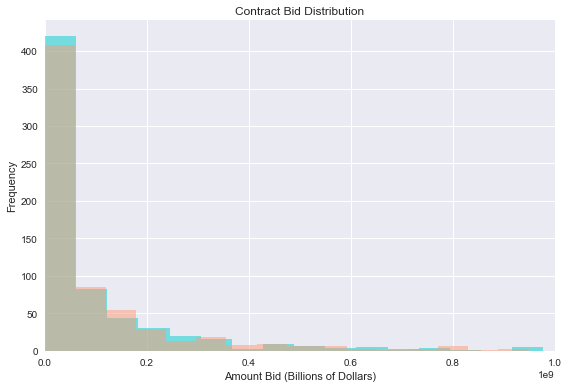

In [160]:
# Display the histogram overlay
limit = 1e9
winner_bids_hist = [bid for bid in winner_bids if (bid < limit)]
filer_bids_hist = [bid for bid in filer_bids if (bid < limit)]

plt.hist(winner_bids_hist, bins='scott', alpha=0.5, color='#00cfcc')
plt.hist(filer_bids_hist, bins='scott',  alpha=0.5, color='#ff9973')
plt.ylabel('Frequency')
plt.xlabel('Amount Bid (Billions of Dollars)')
plt.xlim([0,limit])
plt.title('Contract Bid Distribution')
plt.tight_layout()

plt.savefig('./Project Screenshots/NHST_overlay.png', dpi=300)

## Winner Bid Higher

In [7]:
bids['WinnerBidHigher'] = bids['WinnerBid'] > bids['FilerBid']
# Number of times the winner recieved a
# higher bid
winners_with_higher_bids = len(bids[bids['WinnerBidHigher'] == True])
winners_with_higher_bids_pct = winners_with_higher_bids / len(bids)
print(f"Number of winners with higher bids: {winners_with_higher_bids}")
print(f"Percentage of winners with higher bids: {round(winners_with_higher_bids_pct, 4) * 100}%")

Number of winners with higher bids: 310
Percentage of winners with higher bids: 46.27%


## Quality Premium

In [8]:
bids['Premium'] = (bids['WinnerBid'] / bids['FilerBid']) - 1

print(f"On average, winning bids ask for ~{round(bids['Premium'].mean() * 100, 2)} % more than their competitors.")

On average, winning bids ask for ~1.82 % more than their competitors.


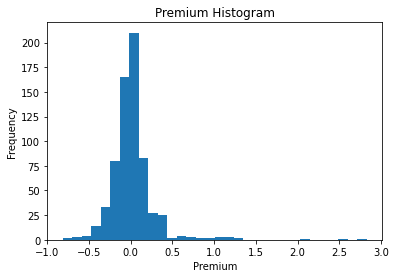

In [9]:
plt.hist(bids['Premium'], bins='scott', color=)
plt.title('Bid Price Premium Histogram')
plt.xlabel('Premium')
plt.ylabel('Frequency');

## Classification - Will you win the contract?

In [49]:
rated_bids = bids.dropna(thresh=8)

# Winning Bids
winning_bids = rated_bids[['Winner', 'WinnerBid', 'Winner_technical', 'Winner_past performance', 'Winner_personnel', 'Winner_management', 'Winner_experience', 'Winner_small business', 'URL']].copy()
winning_bids.rename({'Winner': 'Company', 'WinnerBid': 'Bid', 'Winner_technical': 'technical',  'Winner_past performance': 'past performance',  'Winner_personnel': 'personnel',  'Winner_management': 'management',  'Winner_experience': 'experience',  'Winner_small business': 'small business'}, axis=1, inplace=True)
winning_bids['WonContract'] = 1

# Losing bids
losing_bids = rated_bids[['Filer', 'FilerBid', 'Filer_technical', 'Filer_past performance', 'Filer_personnel', 'Filer_management', 'Filer_experience', 'Filer_small business', 'URL']].copy()
losing_bids.rename({'Filer': 'Company', 'FilerBid': 'Bid', 'Filer_technical': 'technical',  'Filer_past performance': 'past performance',  'Filer_personnel': 'personnel',  'Filer_management': 'management',  'Filer_experience': 'experience',  'Filer_small business': 'small business'}, axis=1, inplace=True)
losing_bids['WonContract'] = 0

# Balanced dataset consisting of companies, their ratings, and
# whether or not they won the government contract
contracts = pd.concat([winning_bids, losing_bids]).reset_index(drop=True)

contracts = contracts[['Company', 'technical', 'past performance', 
                      'personnel', 'management', 'experience', 
                      'small business', 'Bid', 'WonContract', 
                      'URL']]

# Drop contracts that don't have at least
# one measured performance metric
contracts.dropna(thresh=5, inplace=True)

# Fill null values with 0 (neutral) value
contracts.fillna(0, inplace=True)

contracts.sample(10)

,Company,technical,past performance,personnel,management,experience,small business,Bid,WonContract,URL
71,M.C. Dean,0.50,1.00,0.00,0.5,0.0,0.00,1.415628e+06,1,https://www.gao.gov/products/b-418489.3%2Cb-41...
438,Soliel,1.00,1.00,0.00,0.0,0.0,0.00,5.488898e+06,1,https://www.gao.gov/products/b-410591%2Cb-4105...
941,Engility,0.50,-0.25,0.00,0.5,0.5,0.00,3.889420e+07,0,https://www.gao.gov/products/b-413120.3%2Cb-41...
446,Exelis,1.00,1.00,0.00,0.0,0.0,1.00,5.167565e+08,1,https://www.gao.gov/products/b-410329%2Cb-4103...
860,LOGC2,0.00,0.00,0.00,0.0,0.0,0.00,5.076221e+07,0,https://www.gao.gov/products/b-416075
988,DISCOVER,0.75,0.00,-0.75,0.0,0.0,0.00,2.956370e+07,0,https://www.gao.gov/products/b-412773%2Cb-4127...
907,Centerra,0.00,0.85,0.00,0.0,0.0,0.85,2.759320e+08,0,https://www.gao.gov/products/b-414800%2Cb-4148...
728,Pond,0.00,1.00,0.00,0.0,0.0,0.00,3.310869e+07,0,https://www.gao.gov/products/b-418403
1210,DSI,0.75,0.85,0.00,0.0,0.0,0.00,4.909618e+07,0,https://www.gao.gov/products/b-402067
564,Sundt,0.85,0.00,0.00,0.0,0.0,0.00,1.398741e+07,1,https://www.gao.gov/products/b-403227%2Cb-4032...


# Modeling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [34]:
# Separate our dataset into input variables (X) and our
# output variable (y) to prepare our dataset for a 
# variety of different models
X = contracts[['technical', 'past performance', 'personnel', 'management', 
               'experience', 'small business', 'Bid']]

y = contracts[['WonContract']]

# Separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale our data to get the contract bid values 
# under control
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

## Model 0 - Baseline

In [35]:
# Since this is a completely balanced dataset, the baseline
# will be to always predict 1
baseline_results = y_test == 1
predicted_winners, = baseline_results.sum().values  
baseline = predicted_winners / len(y_test)

print(f'Baseline Pct Accuracy: {baseline}')

Baseline Pct Accuracy: 0.5217391304347826


## Model 1 - Logistic Regression

In [36]:
# Import our model class
from sklearn.linear_model import LogisticRegression

# Substantiate our model on our scaled training input
lr = LogisticRegression(random_state=0).fit(X_train_sc, y_train)

# Use this model to predict our contract proposal result
lr_results = lr.predict(X_test_sc)

# Evaluate this model with a confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, lr_results))

              precision    recall  f1-score   support

           0       0.59      0.63      0.61       121
           1       0.64      0.61      0.62       132

    accuracy                           0.62       253
   macro avg       0.62      0.62      0.62       253
weighted avg       0.62      0.62      0.62       253



C:\Users\William\anaconda3\envs\snakes\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Model 2 - KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Define which parameters to try
parameters = {'n_neighbors': [i for i in range(1, 50)], 
              'weights': ('uniform', 'distance'),
              'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}

# Use grid search to try all possible parameter combinations
knn = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1)
knn.fit(X_train_sc, y_train)
knn_results = knn.predict(X_test_sc)

print(knn.best_params_)
print(classification_report(y_test, knn_results))

{'algorithm': 'auto', 'n_neighbors': 29, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.58      0.51      0.55       121
           1       0.60      0.67      0.63       132

    accuracy                           0.59       253
   macro avg       0.59      0.59      0.59       253
weighted avg       0.59      0.59      0.59       253



C:\Users\William\anaconda3\envs\snakes\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


## Model 3 - Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': (100, 500),
              'max_depth': (2, 3, 4, 5),
              'criterion': ('gini', 'entropy')}

rf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1)
rf.fit(X_train_sc, y_train)
rf_results = rf.predict(X_test_sc)

print(rf.best_params_)
print(classification_report(y_test, rf_results))

C:\Users\William\anaconda3\envs\snakes\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.65      0.59      0.61       121
           1       0.65      0.70      0.68       132

    accuracy                           0.65       253
   macro avg       0.65      0.65      0.65       253
weighted avg       0.65      0.65      0.65       253



## Model 4 - XGBoost

In [42]:
from xgboost import XGBClassifier

parameters = {'n_estimators': (5, 10, 15, 20),
              'max_depth': [2],
              'eta': [0.1, 0.15, 0.2, 0.25],
              'lambda': [0.1, 0.15, 0.2, 0.25, 0.3],
              'sampling_method': ['uniform']}

xgbc = GridSearchCV(XGBClassifier(), parameters, n_jobs=-1)
xgbc.fit(X_train_sc, y_train)
xgbc_results = xgbc.predict(X_test_sc)

print(xgbc.best_params_)
print(classification_report(y_test, xgbc_results))

{'eta': 0.1, 'lambda': 0.15, 'max_depth': 2, 'n_estimators': 20, 'sampling_method': 'uniform'}
              precision    recall  f1-score   support

           0       0.68      0.55      0.61       121
           1       0.65      0.77      0.70       132

    accuracy                           0.66       253
   macro avg       0.67      0.66      0.66       253
weighted avg       0.67      0.66      0.66       253



C:\Users\William\anaconda3\envs\snakes\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Generate a grouped bar chart comparing model results

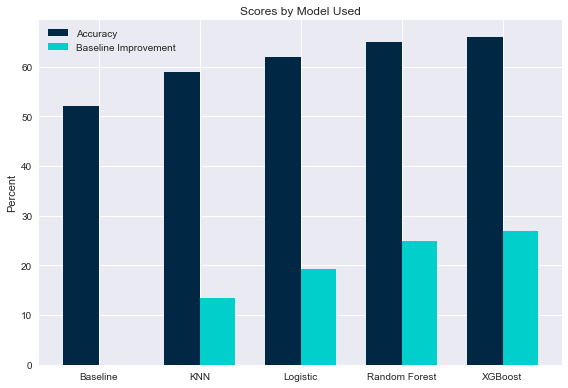

In [149]:
# Grouped bar chart code retrieved from
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

labels = ['Baseline', 'KNN', 'Logistic', 'Random Forest', 'XGBoost']

baseline_int = int(baseline * 100)
scores = [baseline_int, 59, 62, 65, 66]
pct_improvement = [((score - baseline_int) / baseline_int) * 100 for score in scores]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, scores, width, label='Accuracy', color='#002845')
rects2 = ax.bar(x + width/2, pct_improvement, width, label='Baseline Improvement', color='#00cfcc')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Scores by Model Used')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_label(rects1,)
ax.set_label(rects2,)

fig.tight_layout()

plt.savefig('./Project Screenshots/ModelPerformance.png', dpi=300)